# K-Means

## Recap: Unsupervised Learning
We have inputs, but not the target.
The goal of unsupervised learning is to **find patterns** in the data, and build new and useful representations of it.

- **Clustering** algorithm tries to *detect similar groups*.
- **Dimensionality reduction** tries to *simplify the data* without losing too much information.

## Clustering
Ex: Image segmentation - the process of **partitioning** a digital image into multiple segments. The goal is to simplify the representation of the image into something that is easier to analyse. It can be used to **locate objects and boundaries**.

## K-means Algorithm
### Steps
#### 1. Define the k centroids.
Initialize these at random.

* First Idea: 
Randomly pick K training examples.
Set $\mu_1, ... \mu_K$ equal to these K examples.

* Another Idea: 
One idea for initializing k-Means is to use a farthest-first traversal on the data set, **to pick K points that are far away from each other**. However, this is **too sensitive to outliers**

* k-Means++: It works similarly to the “farthest” heuristic. Choose each point at random, with probability proportional to its squared distance from the centers chosen already.

#### 2. Find the closest centroid & update cluster assignments.
Assign each data point to one of the k clusters.
Each data point is assigned to the **nearest centroid’s cluster** (Euclidean distance).

#### 3. Move the centroids to the center of their clusters.
The new position of each centroid is calculated as the **average position of all the points** in its cluster.

#### 4. Repeat steps 2 and 3 until the centroid stop moving a lot at each iteration.
That is, until the algorithm converges.

### Pseudocode
Input:
- K (number of clusters)
- Training set $(x^{(1)}, x^{(2)}, ..., x^{(m)})$

Randomly initialize K cluster centroids $\mu_1, \mu_2, ..., \mu_K$.

Repeat:
- for i = 1 to m
     - $c^{(i)}$ := index (from 1 to K) of cluster centroid **closest** to $x^{(i)}$
- for k = 1 to K
     -  $\mu_k$ := mean of points assigned to $k$
     
### K-Means Optimization Objective
$c^{(i)}$ = index of cluster (from 1 to K) to which example $x^{(i)}$ is currently assigned

$\mu_k$ = cluster centroid k

$\mu_{c^{(i)}}$ = cluster centroid of cluster to which example $x^{(i)}$  has been assigned

Optimization Objective:

$ J(c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_K) = \frac{1}{m}\sum_{i=1}^m|| x^{(i)} - \mu_{c^{(i)}}||$

We want to find $min_{c, \mu} J(c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_K)$

Link: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

### What is the right value of K?
The elbow method: plot the Cost function J as a function of the Number of Clusters. The cost function will decrease as K gets higher.

![Elbow Method](img/elbow.png)

Suppose you run k-means using k = 3 and k = 5. You find that the cost function J is much higher for k = 5 than for k = 3. What can you conclude?
- In the run with k = 5, k-means got stuck in a bad local minimum. You should try re-running k-means with multiple random initializations.

## Outliers
It is often useful to discover outliers and **eliminate them before clustering**.

Also, we often want to **eliminate small clusters** because they frequently represent **groups of outliers**.

## Reducing the SSE with Postprocessing
SSE = Sum of Squared Errors

- **Split a cluster**: the cluster with the largest SSE is usually chosen.
- **Introduce a new cluster centroid**: often the point that is *farthest from any cluster center* is chosen.
- **Merge two clusters**: The clusters with the closest centroids are typically chosen.

# K-Means Variations

## Bisecting k-Means
A straightforward extension of the basic k-means.

To obtain k clusters:
1. Split the set of all points into two clusters,
2. Select one of these clusters to split,
3. Repeat until k clusters have been produced.

## Mini-batch k-Means
Uses mini-batches to reduce the computation time, while still attempting to optimize the same objective function.

**Converges faster** than k-Means, but the quality of the results is reduced.

## k-Medians Clustering
Instead of calculating the mean for each cluster to determine its centroid, one instead **calculates the median**. 

Minimizing error over all clusters with respect to the 1-norm distance metric, as opposed to the square of the 2-norm distance metric (which k-Means does).

## k-Medoids Clustering
Instead of calculating the mean for each cluster to determine its centroid, one instead **calculates the medoid**.
The medoid of a cluster is defined as that object for which the average dissimilarity to all other objects in the cluster is minimal.

Minimizing error over all clusters with respect to the **1-norm distance metric**.

OBS: the 1-norm distance is also known as Manhattan norm, because it corresponds to the sum of the distances along th coordinate axis.

In contrast to the k-Means, k-Medoids **chooses data points as centroids**.

### k-Means (1) vs k-Medoids (2)

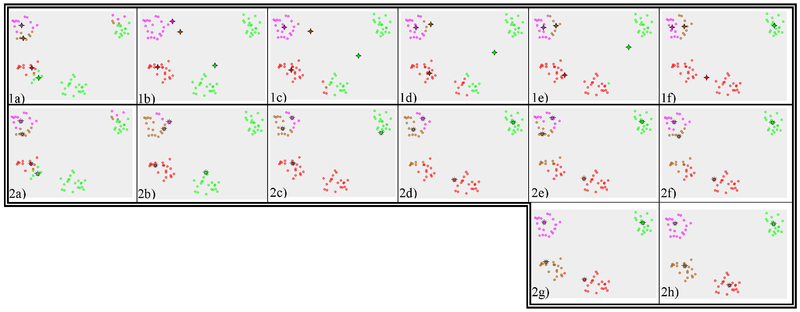

## Fuzzy Clustering (Soft Clustering)
Each data point can belong to more than one cluster. 

# Example

In [5]:
import pandas as pd
X = pd.read_csv('dataset/data_set_4_X.csv', header=None)
y = pd.read_csv('dataset/data_set_4_Y.csv', header=None)

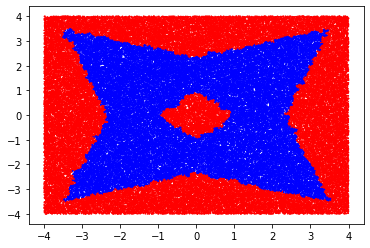

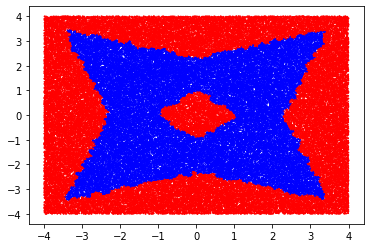

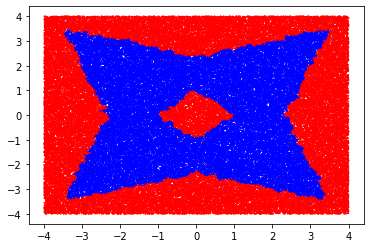

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

m = len(X)
mp = 5000

n_list = [1,2,3]
for n in n_list:
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=mp, test_size=(m - mp))
    classifier = KNeighborsClassifier(n)
    classifier.fit(X_train, y_train.values.ravel())
        
    y_pred = classifier.predict(X_test)
    
    cvals = [-1, 1]
    colors = ["red", "blue"]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm, cvals), colors))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
    Z = np.array(y_pred)

    plt.scatter(X_test[0], X_test[1], c=Z, s=0.5, cmap=cmap, norm=norm)
    plt.show()

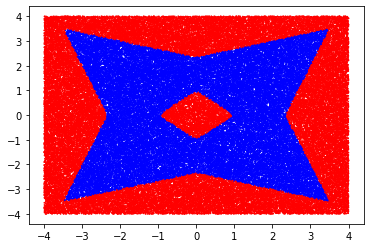

In [26]:
plt.scatter(X_test[0], X_test[1], c=y_test, s=0.5, cmap=cmap, norm=norm)
plt.show()